# Основы математики для data science. Лекция 1.



**Вектора.**
Загрузим датасет "Hessen House Prices Dataset" из kaggle (https://www.kaggle.com/orgesleka/hessen-house-prices-dataset). 1 вектор в данной таблице - это один дом с различными показателями. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
url="http://yustiks.ru/dataset/houses.json"
df=pd.read_json(url)
df.head()

,posterid,Haustyp,Angebotstyp,Wohnflaeche__m²_,Zimmer,abtest,plz,Verkaeufer,yo_m,Baujahr,...,Verfuegbar_ab_Jahr,Dachboden,Verfuegbar_ab_Monat,Nebenkosten__in_€_,Kaution__in_€_,Haustiere_erlaubt,Warmmiete__in_€_,Heizkosten__in_€_,WG_geeignet,Denkmalobjekt
0,50316225,einfamilienhaus,Angebot,160,6,control,33378,gewerblich,A,1928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50379245,mehrfamilienhaus,Angebot,160,8.0,control,65207,gewerblich,A,1968.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40815451,einfamilienhaus,Angebot,120,4,control,54647,gewerblich,A,1750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49513983,einfamilienhaus,Angebot,140,5,control,7646,gewerblich,A,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49797192,einfamilienhaus,Angebot,80,4,control,54597,gewerblich,A,1900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Названия параметров здесь даны на немецком языке. 
В целом, каждая колонка несет информацию о доме.
*  Aktuell_vermietet	- текущий съем
*  Angebotstyp	- тип предложения
*  Badewanne	- ванна
*  Balkon	- балкон
*  Barrierefrei	- доступность
*  Baujahr	- в каком году был куплен
*  Dachboden	- чердак
*  Denkmalobjekt	- тип фундамента
*  Dusche - душ
*  Einbaukueche	 - кухня
*  Einliegerwohnung - апартаменты
*  ExactPreis	- стоимость дома (квартиры)
*  Gaeste_WC	- гостевой туалет
*  Garage/Stellplatz	- гараж
*  Garten/_mitnutzung	- сад
*  Grundstuecksflaeche__m²_	- площадь
*  Haustiere_erlaubt	- наличие домашних животных
*  Haustyp	- тип дома
*  Heizkosten__in_€_	- самая высокая цена
*  Heizungsart	- отопление
*  Kaution__in_€_	- депозит
*  Keller	- чердак
*  Moebliert/Teilmoebliert	
*  Nebenkosten__in_€_	- цена на соседние дома
*  Preis	- стоимость
*  Provision	- комиссия
*  Terrasse	- терраса
*  Verfuegbar_ab_Jahr	
*  Verfuegbar_ab_Monat	
*  Verkaeufer	- продавец
*  WG_geeignet	- туалет
*  Warmmiete__in_€_	- стоимость аренды включая отопление
*  Wohnflaeche__m²_	- площадь жилого помещения
*  Zimmer	- комната
*  abtest	
*  adid
*  elasticSearch	
*  kw	- пояснения о доме
*  plz	
*  posterid	- id объявления
*  yo_m	
*  yo_s

У многих домов отсутствует информация. Вектор - это каждый дом (каждый ряд таблицы). Мы можем складывать вектора и вычитать, таким образом, предсказывать цену дома в зависимости от параметров (наличия комнат, размер жилой площади).

In [9]:
len(df)

22400

Каждый вектор имеет размер 42. Те вектора, в которых отсутстсвуют параметры (есть значения Nan), должны быть предобработаны, чтобы размерность векторов стала одинаковой. Для наглядности, создадим новую таблицу, куда включим только несколько столбцов: это когда был куплен дом, количество комнат, площадь дома и стоимость дома.

In [10]:
df_1 = df[['Baujahr','Zimmer','Wohnflaeche__m²_','Preis']]
df_1.head()

,Baujahr,Zimmer,Wohnflaeche__m²_,Preis
0,1928.0,6,160,90000.0
1,1968.0,8.0,160,90000.0
2,1750.0,4,120,70000.0
3,2017.0,5,140,90000.0
4,1900.0,4,80,90000.0


In [11]:
df_1

,Baujahr,Zimmer,Wohnflaeche__m²_,Preis
0,1928.0,6,160,90000.0
1,1968.0,8.0,160,90000.0
2,1750.0,4,120,70000.0
3,2017.0,5,140,90000.0
4,1900.0,4,80,90000.0
...,...,...,...,...
22395,1905.0,12,160,90000.0
22396,NaN,0,160,90000.0
22397,1908.0,1,160,90000.0
22398,1700.0,4.0,160,45000.0


Почистим данные от Nan:

In [12]:
df_1 = df_1.dropna()

Колонка Zimmer представлена ввиде строк, ее приведем к типу float:

In [13]:
df_1['Zimmer'] = (df_1['Zimmer']).astype(float).astype(int)

<ipython-input-13-8bb8cfb150f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Zimmer'] = (df_1['Zimmer']).astype(float).astype(int)


Можно нарисовать в пространстве каждый из домов (отмечены ввиде scatter: точки в 3D пространстве). 

Возьмем трехмерное пространство, где каждый дом представлен ввиде направляющей из начала координат.

Дома в пространстве 3D от трех параметров: год покупки, площадь дома, цена дома.

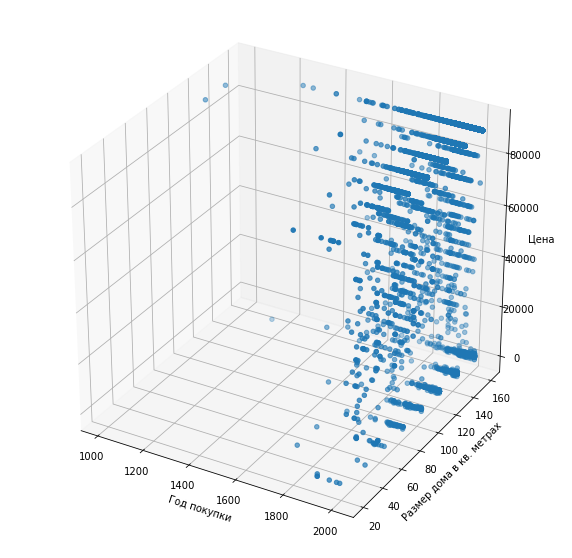

In [14]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Preis'])

ax.scatter(x, y, z)
ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в кв. метрах')
ax.set_zlabel('Цена')
plt.show()

Дома в 3D пространстве от трех параметров: год покупки, площадь территории, комнаты.

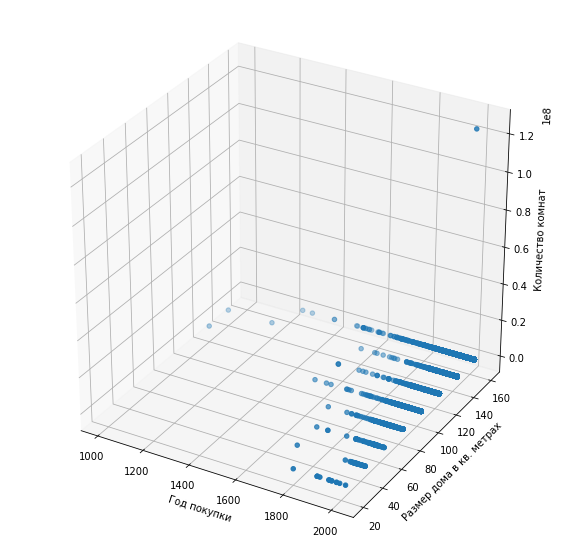

In [15]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.scatter(x, y, z)
ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в кв. метрах')
ax.set_zlabel('Количество комнат')
plt.show()

По графику видно, что есть дома со странным показателем количества комнат (верхняя точка). Действительно, странное максимальное значение у вектора z (несущего информацию о количестве комнат):

In [16]:
max(z)

123456789

Возьмем все дома, количество комнат в которых меньше 12.

In [18]:
df_1 = df_1[df_1['Zimmer']<12]

In [19]:
max(df_1['Zimmer'])

11

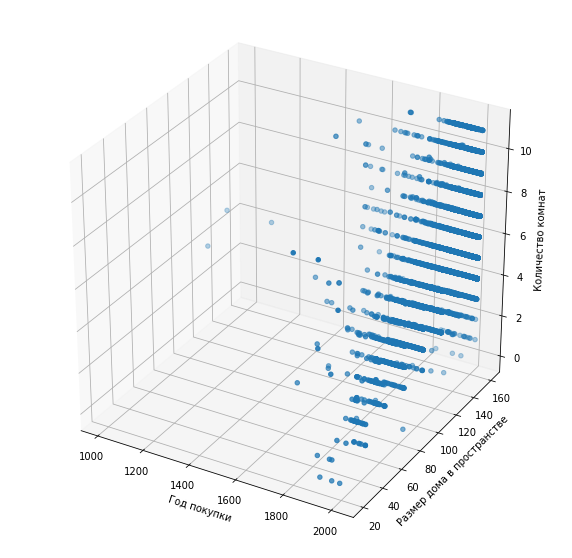

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.scatter(x, y, z)
ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в пространстве')
ax.set_zlabel('Количество комнат')
plt.show()

Данный график получился более показателен. Нарисуем несколько векторов в 3D пространстве: возьмем первые 3 дома из таблицы.

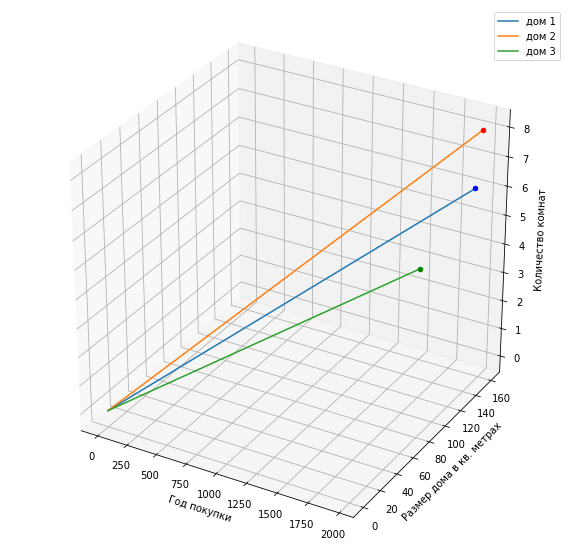

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['Baujahr'])
y = np.array(df_1['Wohnflaeche__m²_'])
z = np.array(df_1['Zimmer'])

ax.plot([0,x[0]], [0,y[0]], [0,z[0]])
ax.plot([0,x[1]], [0,y[1]], [0,z[1]])
ax.plot([0,x[2]], [0,y[2]], [0,z[2]])

ax.scatter(x[0], y[0], z[0], c='b', marker='o')
ax.scatter(x[1], y[1], z[1], c='r', marker='o')
ax.scatter(x[2], y[2], z[2], c='g', marker='o')

ax.set_xlabel('Год покупки')
ax.set_ylabel('Размер дома в кв. метрах')
ax.set_zlabel('Количество комнат')
ax.legend(['дом 1', 'дом 2', 'дом 3'])

plt.show()

Можно заметить, что данные дома в выбранном 3D пространстве (год покупки, жилая площадь, количество комнат) расположены недалеко друг от друга.

# Сложение двух векторов в пространстве.

Допустим, есть 2 изображения, одно изображение большого размера, другое - маленькое. Сложение векторов в пространстве RGB - типичный пример сложения двух векторов.

Изображение представлено ввиде матрицы, где каждый пиксель - это список параметра цвета (R-red, B-blue, G-green).

Загрузим 2 изображения (они должны быть одинаковыми по размеру)

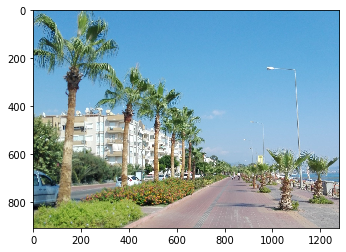

In [23]:
import cv2
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from urllib.request import urlopen
%matplotlib inline

def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, readFlag)

    # return the image
    return image

url = "https://sun9-35.userapi.com/c858432/v858432621/50a3e/liXZAUVr67Q.jpg"
image = url_to_image(url)
img1 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(img1)

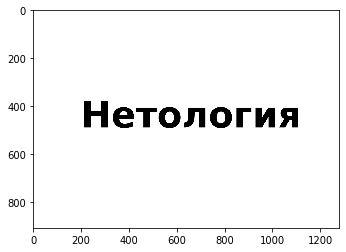

In [24]:
url = "https://sun9-2.userapi.com/c858432/v858432621/50a4f/h-Ru43Ilp28.jpg"
image = url_to_image(url)
img2 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(img2)

Сложим 2 изображения, являющимися векторами в 6-мерном пространстве. 

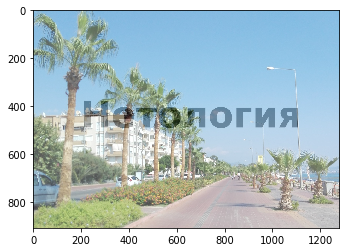

In [0]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

plt.imshow(dst)

opencv - мощная библиотека, с помощью которой выполняются операции с изображениями. В данном случае первое изображение взято с прозрачностью 0,7, а второе - с прозрачностью 0,3.

# Транспонирование матриц

Примеры транспонирования матриц в пространстве.

In [26]:
x = np.arange(15).reshape((5,3))
print(x)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [27]:
np.transpose(x)

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

# Сложение и умножение матрицы на скаляр

In [28]:
A = np.array(([1,3,3],[1,4,3],[1,3,4]))
print(A)

[[1 3 3]
 [1 4 3]
 [1 3 4]]


In [29]:
C = A + 100
print(C)

[[101 103 103]
 [101 104 103]
 [101 103 104]]


Умножение на скаляр

In [30]:
C = A * 100
print(C)

[[100 300 300]
 [100 400 300]
 [100 300 400]]


# Обратная матрица

In [31]:
A = np.array(([1,3,3],[1,4,3],[1,3,4]))
print(A)

[[1 3 3]
 [1 4 3]
 [1 3 4]]


Посчитаем обратную матрицу с помощью **np.linalg.inv**.

In [32]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 7. -3. -3.]
 [-1.  1.  0.]
 [-1.  0.  1.]]


Проверим точность подсчета:

In [33]:
I = A_inv.dot(A)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Смещение объекта с помощью сложения векторов

Вектора в пространстве можно перемещать с помощью сложения векторов или умножения на матрицу трансформаций. 

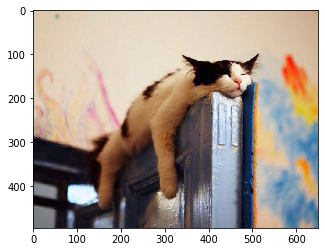

In [34]:
url = "https://sun9-54.userapi.com/c850432/v850432958/4a7cb/11DUOryyU3U.jpg"
image = url_to_image(url)
img3 = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
plt.imshow(img3)

Нарисуем прямоугольник на изображении.

Прямоугольник задан ввиде матрицы:

In [35]:
A = [
    [200, 200],
    [200, 400],
    [500, 400],
    [500, 200]
    ]

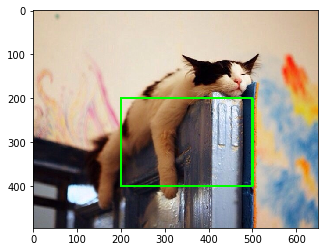

In [36]:
img4 = img3
cv2.rectangle(img4,(A[0][0],A[0][1]),(A[2][0],A[2][1]),(0,255,0),3)
plt.imshow(img4)

Сместим прямоугольник на 100 пикселей по оси X, и на -100 по оси y.

In [37]:
C = np.array(A) + [100,-100]
print(C)

[[300 100]
 [300 300]
 [600 300]
 [600 100]]


Действительно, четырехугольник сместился по изображению на 100 пикселей вправо, и на 100 пикселей вверх

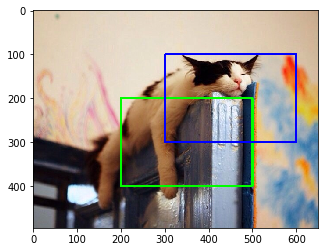

In [38]:
cv2.rectangle(img4,(C[0][0],C[0][1]),(C[2][0],C[2][1]),(0,0,255),3)
plt.imshow(img4)

# Смещение объекта с помощью умножения на матрицу смещения

In [39]:
TransformArray = np.array([
    [1, 0, 100],
    [0, 1, -100],
    [0, 0, 1]
])

Возьмем тот же четырехугольник, но добавим единицы в конце (как того требует формула).

In [40]:
A = [
    [200, 200, 1],
    [200, 400, 1],
    [500, 400, 1],
    [500, 200, 1]
    ]

In [41]:
B = []
for point in A:
    new_point = np.dot(TransformArray, np.transpose(point))
    B.append(new_point)
print(B)

[array([300, 100,   1]), array([300, 300,   1]), array([600, 300,   1]), array([600, 100,   1])]


Сместили изображение в пространстве 2D

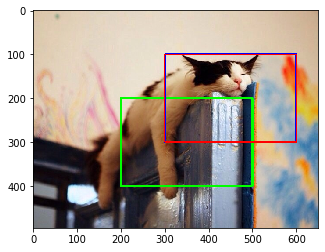

In [42]:
cv2.rectangle(img4,(B[0][0],B[0][1]),(B[2][0],B[2][1]),(255,0,0),2)
plt.imshow(img4)

Можно заметить, что зеленый прямоугольник сместился в красный, который прикрыл собой синий (полученный с помощью сложения векторов), таким образом, наше преобразование верно.

# Масштабирование объекта в пространстве

In [43]:
A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]

In [44]:
A = np.array(A)

(-200, 200)

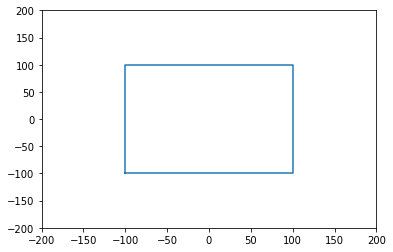

In [45]:
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

Увеличим прямоугольник в размере.

In [46]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 1.5, 0],
    [0, 0, 1]
])

In [47]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[ -50 -150    1]
 [ -50  150    1]
 [  50  150    1]
 [  50 -150    1]
 [ -50 -150    1]]


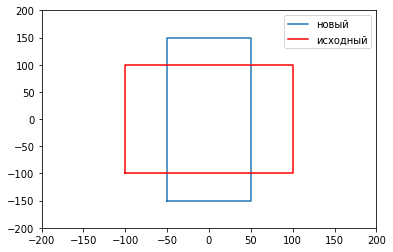

In [48]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Можно заметить, что по оси y прямоугольник увеличился в 1,5 раза, а по оси x уменьшился в 2 раза.

# Повороты на угол относительно начала координат

In [49]:
from math import cos, sin, pi

theta = 30 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

In [50]:
B = []
for point in A:
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[ 132   50    1]
 [  50 -132    1]
 [-132  -50    1]
 [ -50  132    1]
 [ 132   50    1]]


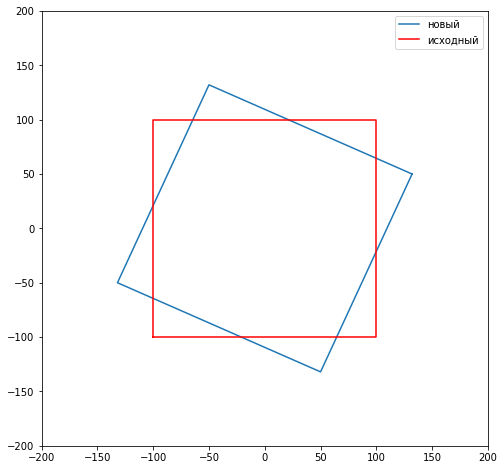

In [51]:
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

Можно заметить, что прямоугольник повернут относительно начала координат на 30 градусов.